Explained variation per PC: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

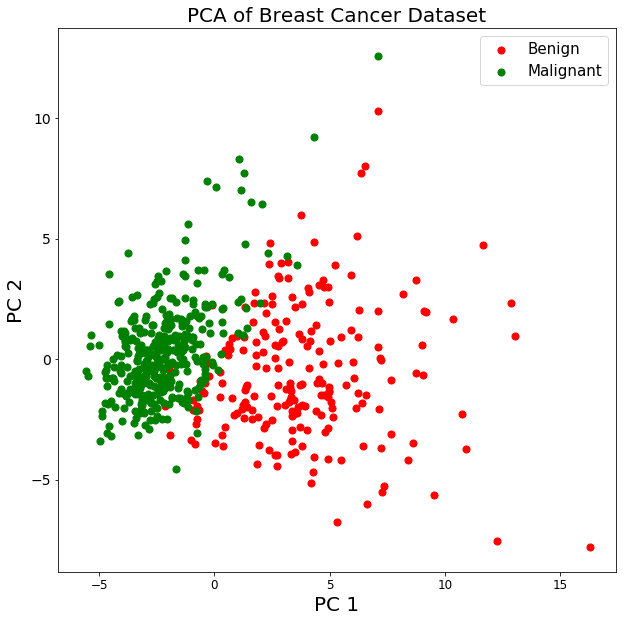

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
b = load_breast_cancer()
b_data = b.data
b_labels = b.target
b_labels.shape
labels = np.reshape(b_labels,(569,1))
final_b_data = np.concatenate([b_data,labels],axis=1)
b_dataset = pd.DataFrame(final_b_data)
features = b.feature_names
features_labels = np.append(features,'label')
b_dataset.columns = features_labels
b_dataset['label'].replace(0, 'Benign',inplace=True)
b_dataset['label'].replace(1, 'Malignant',inplace=True)
from sklearn.preprocessing import StandardScaler
x = b_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_b = pd.DataFrame(x,columns=feat_cols)
pca_b = PCA(n_components=2)
principalComponents_b = pca_b.fit_transform(x)
principal_b_Df = pd.DataFrame(data = principalComponents_b
             , columns = ['PC_1', 'PC_2'])
print('Explained variation per PC: {}'.format(pca_b.explained_variance_ratio_))
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC 1',fontsize=20)
plt.ylabel('PC 2',fontsize=20)
plt.title("PCA of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = b_dataset['label'] == target
    plt.scatter(principal_b_Df.loc[indicesToKeep, 'PC_1']
               , principal_b_Df.loc[indicesToKeep, 'PC_2'], c = color, s = 50)
plt.legend(targets,prop={'size': 15})

<h1 align="center">Feature Selection</h1>

## Explainer Video

In [1]:
from IPython.display import HTML
HTML('<iframe src="https://player.vimeo.com/video/283692067" width="800" height="600" frameborder="0" allow="autoplay; fullscreen" allowfullscreen></iframe>')

C:\Users\makra\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Loading the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('../data/lending.csv')
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,...,total_acc,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,8000.0,8000.0,0,19,261.88,1,64598,0,33000.0,0,...,16.0,15.0,632.47,113.7204,276.88,0.0,0.0,0.0,15949.0,20800.0
1,20800.0,20800.0,0,33,706.16,1,63724,4,81500.0,2,...,41.0,0.0,0.00,0.0000,13334.93,0.0,0.0,0.0,23473.0,43100.0
2,10000.0,10000.0,0,10,321.13,1,72661,0,102000.0,0,...,22.0,0.0,0.00,0.0000,320.91,0.0,0.0,0.0,39143.0,22300.0
3,11500.0,11500.0,1,112,323.54,4,78022,4,32760.0,2,...,17.0,0.0,0.00,0.0000,4874.03,0.0,0.0,92.0,24724.0,14100.0
4,15000.0,15000.0,0,8,476.30,0,100018,0,63000.0,0,...,29.0,0.0,0.00,0.0000,476.23,0.0,0.0,1514.0,272492.0,15400.0


### Logistic Regression without any Feature Selection  we get an accuracy of 0.95.
**Input**

```python
X = df.drop('loan_status',1)
y= df['loan_status'].copy()
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.3 , random_state = 42)
model = LogisticRegression()
model.fit(X_train,y_train)
print("Accuracy:", model.score(X_test,y_test))
```

**Output**

```python
Accuracy: 0.9533965104950846

```

### Remove Correlated Features
As we have learned earlier one of the assumptions of Logistic Regression model is that the independent features should not be correlated to each other(i.e Multicollinearity).We will find the features that have a correlation higher that 0.75 and remove the same so that the assumption for logistic regression model is satisfied.

**Input**
```python 
# Create correlation matrix
corr_matrix = df.drop("loan_status",1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(to_drop)

# Dropping the high correlated features
print("Columns to be dropped: ")
df.drop(to_drop,axis=1,inplace=True)
```
**Output**
```python
Columns to be dropped:
['funded_amnt',
 'installment',
 'grade',
 'collection_recovery_fee',
 'total_rev_hi_lim']
```

In [2]:
# Create correlation matrix
corr_matrix = df.drop("loan_status",1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print("Columns to be dropped: ")
print(to_drop)

Columns to be dropped: 
['funded_amnt', 'installment', 'grade', 'collection_recovery_fee', 'total_rev_hi_lim']


<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 1
***
### Instructions
* Apply Logistic Regression model on a newly created dataframe `df`
* Store all the features(independent values) in a variable called `X`
* Store the target variable `loan_status`(dependent value) in a variable called `y`
* Split `X and y` into `X_train,X_test,y_train,y_test` using `train_test_split()` function. Use `test_size = 0.3`     and `random_state = 42`
* Instantiate a Logistic regression model with `LogisticRegression()` and save it to a variable called `model`.
* Fit the model on the training data `X_train` and `y_train`.
* Calculate the `score` of the model.

In [4]:
from sklearn.linear_model import LogisticRegression
X = df.drop('loan_status',1)
y= df['loan_status'].copy()
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.3 , random_state = 42)
model = LogisticRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.9534319369409264


<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 2
***
Chi-Square test:
In this task we will also try to identify the optimum no. of features to use
### Instructions

* Store all the features(independent values) in a variable called `X`
* Store the target variable `loan_status`(dependent value) in a variable called `y`
* Three variables `nof_list`, `high_score` and `nof` are already defined for you.
* Run a `n` loop passing through each element of `nof_list`.
* Inside the loop, initialise a `SelectKBest()` with the parameters `score_func=chi2` & `k= n` and save it to a variable called `test`.
* Split `X` and `y` into `X_train,X_test,y_train,y_test` using train_test_split() function. Use `test_size = 0.3` and `random_state = 42`
* Fit `test` on the training data `X_train` and `y_train` using the `fit_transform()` method. Store the result back into `X_train`
* Transform `X_test` using the `transform()` method of test .Store the result back into `X_test`
* Initialise a logistic regression model with LogisticRegression() and save it to a variable called `model`.
* Fit the model on the training data `X_train` and `y_train` using the 'fit()' method.
* Write a condition to store the highest R2 score of all `n`. Store the highest R2 score in `high score` and the 
  `n` assosciated with it in `nof`

In [5]:
from sklearn.feature_selection import chi2

from sklearn.feature_selection import SelectKBest

# Code starts here

nof_list=[5,10,15,20,25]

high_score=0

nof=0

for n in nof_list:
    test = SelectKBest(score_func=chi2 , k= n )
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    
    model = LogisticRegression()
    model.fit(X_train,y_train)
    
    if model.score(X_test,y_test)>high_score:
        high_score=model.score(X_test,y_test)
        nof=n 
print("High Score is:",high_score, "with features=",nof)

High Score is: 0.954299884864051 with features= 5


<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 3
***
Analysis of variance (ANOVA) is another method to check for close relationship between two variables.
### Instructions
* Store all the features(independent values) in a variable called `X`
* Store the target variable `loan_status`(dependent value) in a variable called `y`
* Three variables `nof_list`, `high_score` and `nof` are already defined for you.
* Run a `n` loop passing through each element of `nof_list`.
* Inside the loop, initialise a `SelectKBest()` with the parameters `score_func=f_classif` & `k= n` and save it to a variable called `test`.
* Split `X` and `y` into `X_train,X_test,y_train,y_test` using train_test_split() function. Use `test_size = 0.3` and `random_state = 42`
* Fit `test` on the training data `X_train` and `y_train` using the `fit_transform()` method. Store the result back into `X_train`
* Transform `X_test` using the `transform()` method of test .Store the result back into `X_test`
* Initialise a logistic regression model with LogisticRegression() and save it to a variable called `model`.
* Fit the model on the training data `X_train` and `y_train` using the 'fit()' method.
* Write a condition to store the highest R2 score of all `n`. Store the highest R2 score in `high score` and the 
  `n` assosciated with it in `nof`

In [6]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

nof_list=[5,10,15,20,25]

high_score=0

nof=0


for n in nof_list:
    test = SelectKBest(score_func=f_classif , k= n )
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=42)
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train,y_train)

    if model.score(X_test,y_test)>high_score:
        high_score=model.score(X_test,y_test)
        nof=n 
print("High Score is:",high_score, "with features=",nof)

High Score is: 0.9793640952971393 with features= 10


<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 4
***
Recursive Feature Elimination
### Instructions
* Let's now try to implement RFE and see the score in the Lending Loan dataset.
* In this task we will also try to identify the optimum no. of features to use
* Store all the features(independent values) in a variable called `X`
* Store the target variable `loan_status`(dependent value) in a variable called `y`
* Three variables `nof_list`, `high_score` and `nof` are already defined for you.
* Run a `n` loop passing through each element of `nof_list`.
* Inside the loop, split `X` and `y` into `X_train,X_test,y_train,y_test` using train_test_split() function. Use `test_size = 0.3` and `random_state = 42`
* Initialise a logistic regression model with LogisticRegression() and save it to a variable called `model`.
* Initialise a RFE() object with parameters `model` & `n` and store it to a variable called `rfe`.
* Fit `rfe` on the training data `X_train` and `y_train` using the `fit_transform()` method. Store the result into `X_train_rfe`
* Transform `X_test` using the `transform()` method of `rfe` .Store the result into `X_test_rfe`
* Fit the model on the training data `X_train_rfe` and `y_train` using the `fit()` method.
* Write a condition to store the highest R2 score of all `n`. Store the highest R2 score in `high score` and the 
  `n` assosciated with it in `nof`

In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#no of features list

nof_list=[5,10,15,20,25]

#Variable to store the highest score
high_score=0

#Variable to store the optimum features
nof=0

#Code begins here
for n in nof_list:
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.3 , random_state = 42)
    rfe = RFE(model,n)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    
    model = LogisticRegression()
    model.fit(X_train_rfe,y_train)

    if model.score(X_test_rfe,y_test)>high_score:
        high_score=model.score(X_test_rfe,y_test)
        nof=n 
print("High Score is:",high_score, "with features=",nof)

High Score is: 0.9859357010007971 with features= 10


<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 5
***
### Instructions
* Now determine the selected features and also the ranking of the features

In [8]:
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

Num Features: 25
Selected Features: [ True  True  True  True  True  True False  True False  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True False  True]
Feature Ranking: [1 1 1 1 1 1 6 1 3 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 4 1 7 1]


<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 6
***
### Instructions
* The above assignment does not enlist the features to be selected. Select all the column names and the selected features above and arrange them in their respective order appropriately. 

In [9]:
import operator
features = list(X.columns) # column names
scores = list(rfe.support_) # scores of features
d = dict(zip(features, scores))
sorted(d.items(), key=operator.itemgetter(1))

[('emp_title', False),
 ('annual_inc', False),
 ('title', False),
 ('collections_12_mths_ex_med', False),
 ('acc_now_delinq', False),
 ('tot_cur_bal', False),
 ('loan_amnt', True),
 ('funded_amnt', True),
 ('term', True),
 ('int_rate', True),
 ('installment', True),
 ('grade', True),
 ('home_ownership', True),
 ('verification_status', True),
 ('purpose', True),
 ('zip_code', True),
 ('addr_state', True),
 ('dti', True),
 ('delinq_2yrs', True),
 ('inq_last_6mths', True),
 ('open_acc', True),
 ('pub_rec', True),
 ('revol_bal', True),
 ('revol_util', True),
 ('total_acc', True),
 ('total_rec_late_fee', True),
 ('recoveries', True),
 ('collection_recovery_fee', True),
 ('last_pymnt_amnt', True),
 ('tot_coll_amt', True),
 ('total_rev_hi_lim', True)]

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 7
***
### Instructions
* Plot a heatmap depicting the correlation between variables in the Student Performance dataset

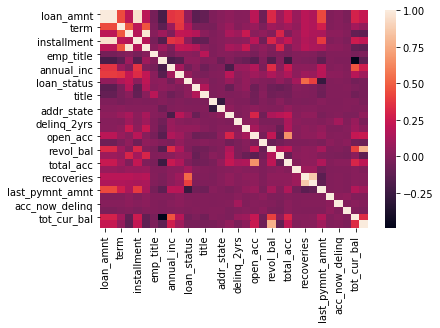

In [11]:
import seaborn as sns
sns.heatmap(df.corr())

<img src='../images/icon/quiz.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

### Feature Selection 

***

Q1.  Which of the following is NOT a benefit of the sparsity imposed by the Lasso?
```python
a. Sparse models are generally more easy to interperet
b. The Lasso does variable selection by default
c. Using the Lasso penalty helps to decrease the bias of the fits correct
d. Using the Lasso penalty helps to decrease the variance of the fits
```
Q2. Which of the following methods uses the classifier performance for feature selection?

```python 
a. filter
b. wrapper
c. embedded

```
Q3.Which of the below statement is True? 
Statement 1: Filter methods measure the relevance of features by their correlation with dependent variable while wrapper  methods measure the usefulness of a subset of feature by actually training a model on it.
Statement 2: Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally very expensive as well.
```python
a. Both are True
b. Both are False
c. Statement 1 is True, Statement 2 is False
d. Statement 2 is True, Statement 1 is False

```

Q4. Which of the following methods is used to find correlation between continous features and target?
```python
a. Pearson
b. LDA
c. Chi Square
d. Anova

```
Q5. The following is the equation for Ridge Regression. Now as we increase the value of $\lambda$ from 0, the bias will?



![](../images/icon/Ridge.png)


```python
a. Steadily increase
b. Remains constant
c. Steadily decrease
```


# Thank You
***
### Next Session: Decision Tree
For more queries - Reach out to academics@greyatom.com 